In [2]:
!pip install xgboost
import xgboost

   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/99.8 MB 435.7 kB/s eta 0:03:49
   ---------------------------------------- 0.1/99.8 MB 871.5 kB/s eta 0:01:55
   ---------------------------------------- 0.2/99.8 MB 1.5 MB/s eta 0:01:06
   ---------------------------------------- 0.4/99.8 MB 1.9 MB/s eta 0:00:54
   ---------------------------------------- 0.8/99.8 MB 3.3 MB/s eta 0:00:31
   ---------------------------------------- 1.1/99.8 MB 4.0 MB/s eta 0:00:25
    --------------------------------------- 1.4/99.8 MB 4.0 MB/s eta 0:00:25
    --------------------------------------- 1.8/99.8 MB 4.6 MB/s eta 0:00:22
   - -------------------------------------- 2.6/99.8 MB 5.9 MB/s eta 0:00:17
   - -------------------------------------- 3.4/99.8 MB 7.1 MB/s eta 0:00:14
   - -------------------------------------- 4.2/99.8 MB 7.9 MB/s eta 0:00:13
   - ----

In [9]:
!pip install lightgbm

   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   - -------------------------------------- 0.1/1.3 MB 812.7 kB/s eta 0:00:02
   ---- ----------------------------------- 0.2/1.3 MB 1.3 MB/s eta 0:00:01
   --------- ------------------------------ 0.3/1.3 MB 1.9 MB/s eta 0:00:01
   --------------- ------------------------ 0.5/1.3 MB 2.5 MB/s eta 0:00:01
   ------------------------------ --------- 1.0/1.3 MB 4.1 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.5 MB/s eta 0:00:00


In [12]:
!pip install catboost

   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/101.1 MB ? eta -:--:--
   ---------------------------------------- 0.1/101.1 MB 656.4 kB/s eta 0:02:34
   ---------------------------------------- 0.1/101.1 MB 1.1 MB/s eta 0:01:35
   ---------------------------------------- 0.3/101.1 MB 1.8 MB/s eta 0:00:57
   ---------------------------------------- 0.6/101.1 MB 2.8 MB/s eta 0:00:36
   ---------------------------------------- 1.0/101.1 MB 3.8 MB/s eta 0:00:27
    --------------------------------------- 1.8/101.1 MB 5.8 MB/s eta 0:00:17
   - -------------------------------------- 2.7/101.1 MB 7.8 MB/s eta 0:00:13
   - -------------------------------------- 3.6/101.1 MB 9.1 MB/s eta 0:00:11
   - -------------------------------------- 4.6/101.1 MB 10.2 MB/s eta 0:00:10
   -- ------------------------------------- 5.5/101.1 MB 10.9 MB/s eta 0:00:09
   -- ------------------------------------- 5.9/101.1 MB 11.2 MB/s eta 0:0

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

In [19]:
data= pd.read_csv("C:/Users/DELL/Desktop/veri bilimi kampı/diabetes.csv")
df=data.copy()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [21]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [22]:
df["Outcome"].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: ylabel='Outcome'>

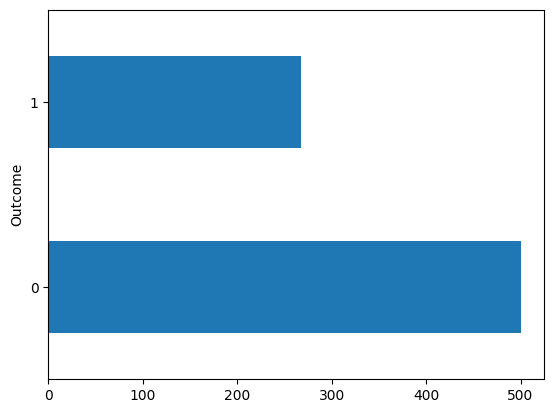

In [23]:
df["Outcome"].value_counts().plot.barh()

In [24]:
y=df["Outcome"]
x=df.drop(["Outcome"], axis=1)
x_train, x_test,y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [25]:
loj_model=LogisticRegression()
loj_model.fit(x_train, y_train)
loj_model

LogisticRegression()

In [26]:
loj_model.intercept_

array([-8.02180517])

In [27]:
loj_model.coef_

array([[ 0.09089039,  0.03421397, -0.01395749,  0.00288144, -0.00144199,
         0.08916714,  0.82346438,  0.01567839]])

In [30]:
y_pred = loj_model.predict(x)

In [31]:
confusion_matrix(y,y_pred)

array([[443,  57],
       [110, 158]], dtype=int64)

In [34]:
accuracy_score(y,y_pred)*100

78.25520833333334

In [35]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       500
           1       0.73      0.59      0.65       268

    accuracy                           0.78       768
   macro avg       0.77      0.74      0.75       768
weighted avg       0.78      0.78      0.78       768



In [36]:
y_pred[:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [37]:
loj_model.predict_proba(x)[:10]

array([[0.27301807, 0.72698193],
       [0.93781552, 0.06218448],
       [0.23043331, 0.76956669],
       [0.94804276, 0.05195724],
       [0.09882206, 0.90117794],
       [0.84720429, 0.15279571],
       [0.91960331, 0.08039669],
       [0.36950918, 0.63049082],
       [0.27879926, 0.72120074],
       [0.96511459, 0.03488541]])

In [43]:
y_probs = loj_model.predict_proba(x)
y_probs= y_probs[:,1]
y_probs[:10]

array([0.72698193, 0.06218448, 0.76956669, 0.05195724, 0.90117794,
       0.15279571, 0.08039669, 0.63049082, 0.72120074, 0.03488541])

In [44]:
y_pred=[1 if x>0.5 else 0 for x in y_probs]
y_pred[:10]

[1, 0, 1, 0, 1, 0, 0, 1, 1, 0]

In [45]:
confusion_matrix(y,y_pred)

array([[443,  57],
       [110, 158]], dtype=int64)

In [46]:
accuracy_score(y,y_pred)*100

78.25520833333334

In [48]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(x))
logit_roc_auc

0.737776119402985

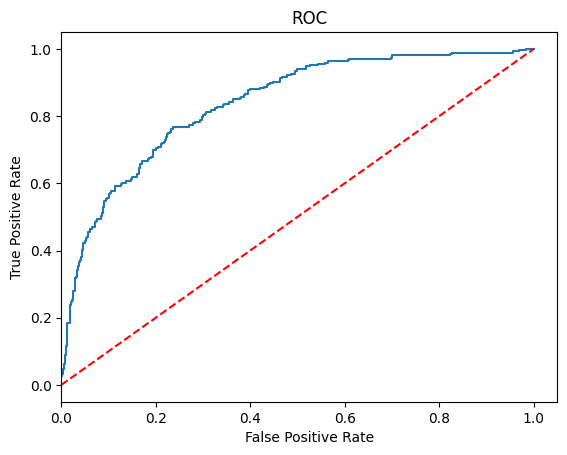

In [50]:
fpr,tpr, tresholds= roc_curve(y, loj_model.predict_proba(x)[:,1])
plt.figure()
plt.plot(fpr,tpr,label="AUC = {:.2f}".format(logit_roc_auc))
plt.plot([0,1],[0,1],linestyle='--',color='red',label='Logistic Regression')
plt.xlim([0.0,1.0])
plt.xlim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("ROC")
plt.show()

In [53]:
y=df["Outcome"]
x=df.drop(["Outcome"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=0)
loj= LogisticRegression().fit(x_train,y_train)
accuracy_score(y_test, loj.predict(x_test))

0.7792207792207793

# knn

In [55]:
df = data.copy()
y=df["Outcome"]
x=df.drop(["Outcome"], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)
knn=KNeighborsClassifier()
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [58]:
y_pred=knn.predict(x_test)

In [59]:
accuracy_score(y_test, y_pred)

0.7532467532467533

In [60]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.81      0.82       107
           1       0.59      0.62      0.60        47

    accuracy                           0.75       154
   macro avg       0.71      0.72      0.71       154
weighted avg       0.76      0.75      0.75       154



# Model tuning

In [ ]:
knn_params = {"n_neigbors":np.arrange(1,50,5)}

In [68]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10) 
# cv=10 verinin test aşamasında verinin 10 farklı yerinden test yapıyor

In [69]:
knn_cv.fit(x_train, y_train)

InvalidParameterError: The 'param_grid' parameter of GridSearchCV must be an instance of 'dict' or an instance of 'list'. Got KNeighborsClassifier() instead.

In [ ]:
print("En yüksek skor:",knn_cv.best_score_)

In [ ]:
print("En iyi parametreler:"+str(knn_cv.best_params_))

In [70]:
rf= RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier()

In [71]:
accuracy_score(y_test, y_pred)

0.7532467532467533

random forest model tuning

In [72]:
rfModel = RandomForestClassifier()
rfParams = {"max_depth": [2,5,8,10], "max_features":[2,5,8], "n_estimators":[10,50,100], 
            "min_samples_split":[2,5,10]}
rfCVModel = GridSearchCV(rfModel, rfParams, cv=10)
rfCVModel.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 8, 10], 'max_features': [2, 5, 8],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100]})

In [73]:
print("En iyi parametreler:"+str(rfCVModel.best_params_))

En iyi parametreler:{'max_depth': 2, 'max_features': 5, 'min_samples_split': 10, 'n_estimators': 100}
